In [ ]:
### FUTURES PRICE, YIELD, USE -predict-> SPOT PRICES ###  
### plots of futures, spot prices, and yield ###

### NEXT STEPS ### 
## Processing, EDA 
# Calculate Stocks to Use Ratio


## Models ##

# LSTM model w/ supply demand features (stocks to use ratio)
# ARMA, ARCH, GARCH
# Modeling residuals

            nearby_close
dates                   
2008-02-04        1326.0
2008-02-05        1323.0
2008-02-06        1318.5
2008-02-07        1331.5
2008-02-08        1339.0


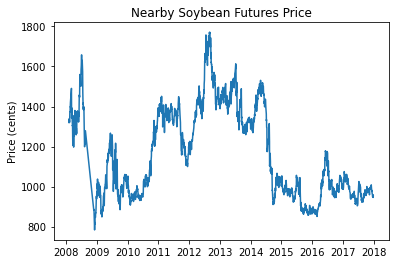

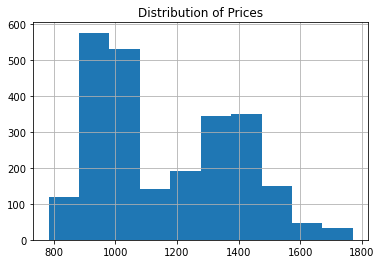

            Open     High      Low    Close  Volume  OpenInt  TotalOpenInt
dates                                                                     
2010-11-12   0.0  1093.50  1093.50  1093.50     0.0      0.0      636147.0
2010-11-15   0.0  1107.00  1107.00  1107.00     0.0      0.0      636604.0
2010-11-16   0.0  1067.00  1067.00  1067.00     0.0      0.0      628018.0
2010-11-17   0.0  1054.00  1054.00  1054.00     0.0      0.0      617458.0
2010-11-18   0.0  1081.25  1081.25  1081.25     0.0      0.0      612503.0


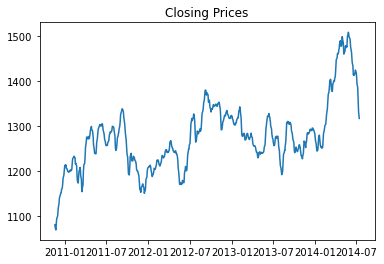

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd 
%matplotlib inline

######################################
### NEARBY CONTRACT CLOSING PRICES ###
######################################
### i.e FUTURES ###
### nearby_close; 2477 rows; 2008-2017
### contract value at date-x in future made on date-y in the present? how far apart are dates?

soyNear = pd.read_csv('./input/soybean_nearby.txt') 
soyNear['dates'] = pd.to_datetime(soyNear['dates'])
soyNear.set_index('dates', drop=True, inplace = True)
soyNear = soyNear.sort_index()

print(soyNear.head())

plt.plot(soyNear.index, soyNear.rolling(window=1).mean())
plt.title('Nearby Soybean Futures Price')
plt.ylabel('Price (cents)')
plt.show()

soyNear.nearby_close.hist()
plt.title('Distribution of Prices')
plt.show()

### SPOT PRICES ###
OHLC = pd.read_csv('./input/soybean_JUL14.txt') 
OHLC['dates'] = pd.to_datetime(OHLC['dates'])
OHLC.set_index('dates', drop=True, inplace = True)
OHLC = OHLC.sort_index()

print(OHLC.head())
plt.plot(OHLC.index, OHLC.Close.rolling(window=5).mean())
plt.title('Closing Prices')
plt.show()
#open, high, low, close, volume, opentInt, and TotalOpenInt; 942 rows; 2010-2014



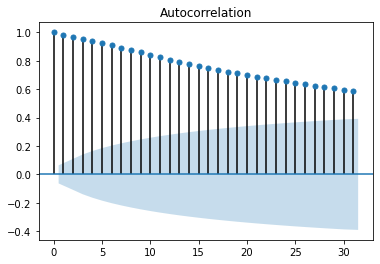

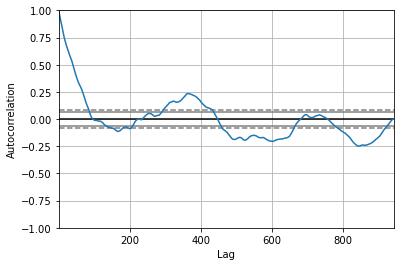

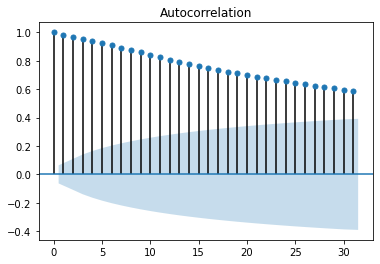

In [31]:
#https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/
from pandas.plotting import lag_plot, autocorrelation_plot
#1 - canned lag plot
#lag_plot(OHLC.Close)

#2 - scatter plot with manually shifted series
# t = OHLC.Close[1:len(OHLC)]
# t_1 = OHLC.Close[0:len(OHLC)-1]
# plt.scatter(t, t_1)
# plt.show()

#3 - correlation between lagged series and original series
#pd.concat( [OHLC.Close.shift(1), OHLC.Close], axis = 1).corr()

#4 Auto-correlatoin plot
autocorrelation_plot(OHLC.Close)

#5 Auto-correlation plot 
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(OHLC.Close, lags = 31)

#6 Persistence Model 

            Open     High      Low    Close  Volume  OpenInt  TotalOpenInt  \
dates                                                                        
2010-11-12   0.0  1093.50  1093.50  1093.50     0.0      0.0      636147.0   
2010-11-15   0.0  1107.00  1107.00  1107.00     0.0      0.0      636604.0   
2010-11-16   0.0  1067.00  1067.00  1067.00     0.0      0.0      628018.0   
2010-11-17   0.0  1054.00  1054.00  1054.00     0.0      0.0      617458.0   
2010-11-18   0.0  1081.25  1081.25  1081.25     0.0      0.0      612503.0   

            nearby_close  
dates                     
2010-11-12       1263.00  
2010-11-15       1286.50  
2010-11-16       1219.75  
2010-11-17       1205.00  
2010-11-18       1242.00  


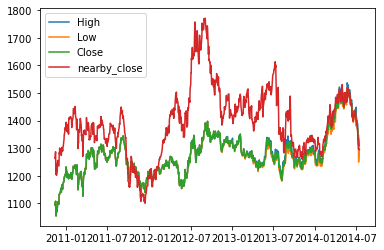

In [2]:
### Merge data-sets: SPOT prices with FUTURES prices ###
#print(OHLC.head())
#print(soyNear.head())
#OHLC.merge(soyNear, on = 'dates', left_index = True).shape #942, 8
prices = OHLC.merge(soyNear, on = 'dates', how = 'left', left_index = True)

print(prices.head())
prices_vars = ['High','Low','Close','nearby_close']
plt.plot(prices.loc[:,prices_vars])
plt.legend(prices_vars)

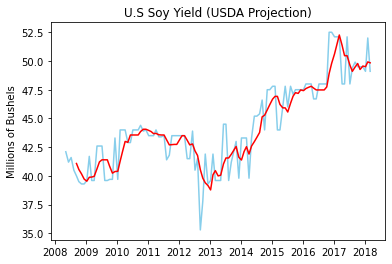

In [3]:
#Area Planted, Area Harvested, Yield, 
#Beginning Stocks, Production, Imports, Total Supply, Crushings, Exports, Seed, Residual, Total Use, Ending Stocks, 
# World Beginning Stocks, World Production, World Imports, World DomesticCrush, World DomesticTotal, World Exports, World EndingStocks, 
### World, United States, Argentina, Brazil, China, Japan, Mexico, EU ###
#Beginning Stocks
#Production
#Imports
#DomesticCrush
#DomesticTotal
#Exports
#Ending Stocks

soyfiles = [file for file in os.listdir('./input') if 'USDAProj_Soybean' in file]
soyData = [pd.read_csv('./input/' + file) for file in soyfiles]
df1 = pd.concat(soyData)

######################################
### LOOKING AT VARIABLES OVER TIME ###
######################################
df1.rename({'Date':'dates'}, axis = 'columns', inplace = True)
df1['dates'] = pd.to_datetime(df1['dates'])
df1.set_index('dates', drop=True, inplace = True)
df1 = df1.sort_index()

### Some WASDE dates more than one row of values - 
#the second one is the projection at the time of publication  
dfs = []
for i, df in df1.groupby(pd.Grouper(freq='1M')):    
    try:
        dfs.append(df.iloc[1])
    except:
        pass
df1 = pd.concat(dfs, axis = 1).transpose()
df1.index.name = 'dates'

#df1['Yield-Annual'] = df1.groupby(pd.Grouper(freq='Y')).Yield.transform('mean')
df1['Yield-Smooth'] = df1.Yield.rolling(window=5).mean()

### YIELD ###
plt.plot(df1.index, df1.Yield, color='skyblue')
plt.plot(df1.index, df1['Yield-Smooth'], color='red')

plt.title('U.S Soy Yield (USDA Projection)')
plt.ylabel('Millions of Bushels')
plt.show()


# plt.plot(df1.index, df1['Area Harvested'])
# plt.show()

# plt.plot(df1.index, df1['Area Planted'])
# plt.show()

#Date, datetime,
#visualization
 
##df1.iloc[len(df1)-12:]
#df1.loc['2014-03-10']
#Can compare some results with homie's notebook here --
#https://www.kaggle.com/nicewinter/soybean-wsde-analysibs

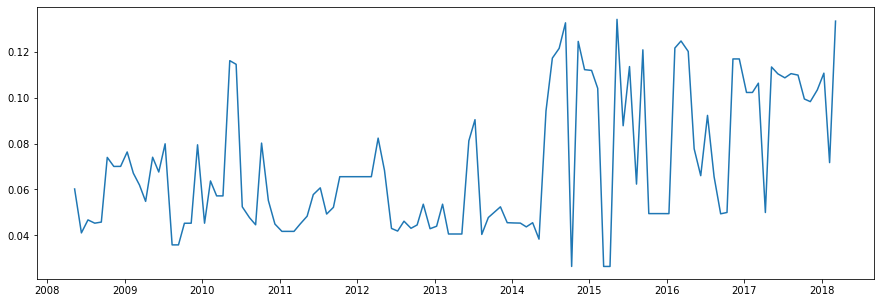

In [4]:
### STOCKS TO USE RATIO ###
### Ending Stocks / Total Use ###

df1['StocksToUse'] = df1['Ending Stocks']/df1['Total Use']

plt.subplots(figsize = (15,5))
plt.plot(df1.index, df1.StocksToUse)

In [6]:
### DEFINE X matrix and Y vector ###
### Training and Test Data ###

finalDF = df1.merge(prices, on = 'dates', how = 'inner' )

X_vars = ['StocksToUse','TotalOpenInt','nearby_close']
y_var = ['Close']

### Split into train and test ###
row = int(len(finalDF)*0.9)
X_train = finalDF.loc[finalDF.index[:row],X_vars]
y_train = finalDF.loc[finalDF.index[:row],y_var]

X_test = finalDF.loc[finalDF.index[row:],X_vars]
y_test = finalDF.loc[finalDF.index[row:],y_var]

In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

def build_model( layers ):
    dropout = 0.2
    model = Sequential()
    # Add LSTM layer with 20% dropout regularization
    model.add(LSTM(50, input_shape=(layers[0], layers[1]), return_sequences=True))
    model.add(Dropout(dropout)) 
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(dropout)) 
    model.add(Dense(32, kernel_initializer="uniform", activation="relu"))
    model.add(Dense(1, kernel_initializer="uniform", activation="linear"))
     
    model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
    return model

model = build_model( [X_train.shape[0], X_train.shape[1],  1 ])

model.fit( X_train, y_train, batch_size=32, epochs=100)
y_pred = model.predict( X_test )


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/Applications/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/Applications/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/Applications/anaconda3/lib/python3.7/imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "/Applications/anaconda3/lib/python3.7/imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: dlopen(/Applications/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/_pywrap_tensorflow_internal.

In [ ]:
import tensorflow as tf
tf.__version__

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-4ae80da9abf6>", line 2, in <module>
    tf.__version__
AttributeError: module 'tensorflow' has no attribute '__version__'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Applications/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File 